<a href="https://colab.research.google.com/github/eridanletalis/geekbrains_ab/blob/main/hw_ab_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Урок 7. Нестандартные ситуации </h1>
<div>На основе выбранных продуктов из первого вебинара, выберите 2 A/B-теста и составьте план эксперимента, чтобы избежать Peeking Problem <br />
Распишите, какие метрики и как вы будете анализировать
</div>

**Гипотеза 1 (переработанная)**: "Если сайт будет работать на 30% быстрее, в среднем клиенты будут наполнять корзину большем количеством разных товаров, таким образом, срдняя стоимость корзины увеличится на 7%". <br />
*Обоснование гипотезы*: Если клиенты будут тратить меньше времени на ожидание перехода от одного товара (одной группы товаров) к другому или меньше ждать открытие описания или отзывов, то они будут меньше хотеть завершить работу с сайтом, как только положат в корзину минимум товаров. С большей охотой клиенты перейдут к другим товарам, которые, возможно, прямо сейчас им не нужны, но они не стали бы их просматривать, раздражаясь медленной работой сайта. <br />
*Техническое обеспечение эксперимента*: Так как проводить оптимизацию базы данных и работы сайта до получения результатов А/B тестирования дорого, то на время эксперимента клиенты из тестируемой группы будут перенаправляться на арендованный на время тестирования более быстрый и дорогой сервер.<br />
*Клиенты и цифры*: Все не бизнес-клиенты. Для эксперимента выбирается площадка в г.Екатеринбург, так как потенциальное число клиентов, отправленный на арендованный быстрый сервер, позволяет минимизировать затраты на аренду сервера и мы получим аналитику, характерную для города-миллионника, а также сможем экстраполировать результаты на другие города-миллионники, за исключением г. Москва. Участвуют клиенты, пришедшие с десктопной и мобильной версии сайта. Так как мы предоставляем возможность наполнения корзины без предварительной регистрации, то клиенты не могут быть разделены по какому-либо признаку априори, поэтому разделение на группы будет выполняться автоматически в момент захода на сайт. Разработчикам веб-интерфейса следует дать задание обнулить cookie-файлы подключениям из г.Екатеринбург и внедрить идентификатор, к какой группе (А или А1, А или B) они относятся. Cookie-файлы с идентификатором должны быть валидны на протяжении каждого этапа экспериментов (А/А, А/В). Если клиент получает cookie-файл, будучи авторизованным, либо авторизуется после получения идентификатора, ему должен быть выдан новый идентификатор, чтобы учитывать его заходы, как с десктоп-верии, так и с мобильной версии, за один заход<br />
Для эксперимента потребуется 26 000  сэмплов. Так как ежедневно мы имеем из г.Екатеринбург 5 000 уникальных заходов на сайт, то при отношении заход/наполнение корзины, равном 0.1, потребуется $26 000/(5 000*0.09) =  58 $ дней эксперимента. На время эксперимента запрещается проводить крупные изменения интерфеса и работу с тикетами, кроме критичности "Блокер".<br />
Если клиент завершил покупку (довёл до транзакции), то следует обнулить его cookie-файл и новое наполнение корзины считать за новый сэмпл.<br />
Дать задание группе инженеров подобрать необходимый сервер со сроком аренды на 3 месяца (1 месяц на миграцию и тесты, 2 месяца - непоредственный эксперимент) и начать миграцию, предусмотрев обновление базы на арендованном сервере по необходимости.<br />
Для проведения А/А теста предполагаем, что выборки не должны отличаться более, чем на 10% и в целях сокращения проверки рандомизатора время на его тестирование выделяется не 1 месяц, за который группа инженеров должна подготовить сервер, а группа разработчиков должна закрыть все критичные тикеты (с приоритетом "Высокий" и "Блокер") для минимизации рисков внесения изменений в процессе эксперимента. 
Доступ к сырым данным тестирования и исторической информации ограничить на время проведения теста - запросы на выборку данных и доступ к дашборду эксперимента должны быть только у ведущего аналитика и выдаваться по запросу.  



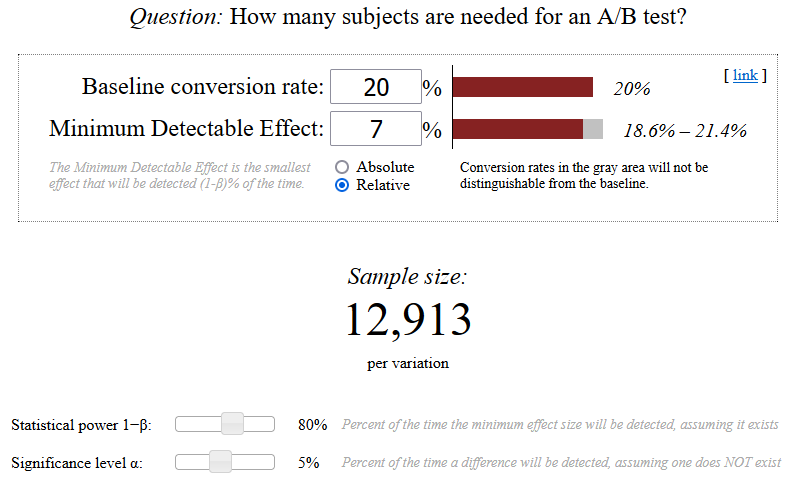

*План эксперимента*:
1. Вносим изменение в код сайта для проведения А/А тестирования
2. Параллельно этому закрываются критические тикеты со стороны разработки, к моменту начала А/В части все изменения должны быть на продуктовом сервере, вводится мораторий на изменения, кроме тикетов типа "Блокер"; на арендованный сервер производится накатка базы и перенос интерфейсной части, а также создаются механизмы для параллельного внесения изменений в тестируемую и контрольную часть сайта и базы.
3. Раз в неделю происходит проверка того, что А/А тест проходит успешно. 
4. На 26ой день А/А тестирования принимается решение, корректно ли работает рандомизатор. Если выявляются проблемы, создаётся распоряжение о депримировании группы инженеров, ответственных за внедрение А/А теста и эксперимент возвращается к стадии 1.
5. Вводится мораторий на изменения ниже уровня "Блокер", доступ к дашборду закрывается для всех лиц, кроме как для ведущего аналитика. 
6. Эксперимент длиться ровно 58 дней, на 59 день клиенты должны отправляться только на старый сервер.
7. Параллельно даём группе технической поддержки задание сообщать о тикетах группы "Медленно/плохо работает сайт". Если такие тикеты будут встречаться в ходе А/В эксперимента, возможно, плохо работает рандомизатор, считая одного пользователя за друх и подтверждённые случаи следует убирать из выборки. Кроме того, имеет смысл собрать данные по таким обращениям, чтобы были дополнительные аргументы за ускорение работы сайта, если А/В эксперимент даст результат в пользу ускорения, но руководство потребует дополнительных аргументов.


**Гипотеза 2 (переработанная)**: "Если система рекомендаций будет давать на 50% более релевантные рекомендации, то средняя стоимость заполненной корзины будет на 20% выше".
*Обоснование гипотезы*: Утрированно, если мы будем предлагать покупателю к кофе приобрести свежевыпеченный круасан и бутылку охлаждённой воды, мы получим больший средний чек, нежели к кофе мы бы предложили тарелку супа и стейк. 
*Техническое обеспечение эксперимента*: Так как разработка полной автоматизированной системы рекомендаций экспертного уровня дорогая, то следует выбрать одну группу товаров и проработать систему рекомендаций вручную. Для этого нужно проанализировать, что предлагает текущая система. Далее, опросить группу экспертов, задав им вопросы: "Какие предложения следует убрать для данного товара?", "Какие предложения следует добавить для данного товара?", "Как отранжировать (в каком порядке выдавать) предложения для данного товара?". Получившуюся экспертную оценку следует валидировать любым методом для экспертных систем и внедрить для группы B.
Для того, чтобы зафиксировать изменения, нам требуется 3200 семплов.
Так как у нас ограниченная выборка, мы увеличим число семплов вдвое до 6400 штук. Из состава заполненной корзины будем убирать все товары, которые не входят в нашу переработанную группу, и считаем итоговую стоимость корзины. Если стоимость корзины клиента равно 0, корзина исключается из просмотра.   
*Клиенты и цифры*: Все авторизованные не бизнес клиенты. Необходимо Эксперимент длиться до достижении контрольного значения для семплов.

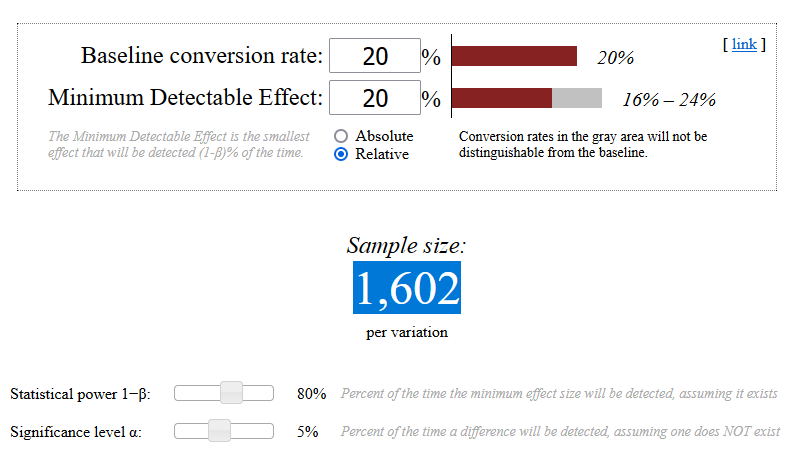

*План эксперимента*:
1. А/А тестирование не производится.
2. Вводится система рекомендаций, которую мы выбрали для В группы.
3. Вводим запрет на доступ к дашборду тестирования для всех, кроме ведущего аналитика. Информация о наборе целевого количества семплов должна автоматически рассылаться группе аналитиков и владельцу продукта.
4. После завершения эксперимента выполняем анализ о значимости результатов.